In [1]:
import numpy as np
import ipyvolume as ipv
from compas.geometry import Point, Frame, Box, Sphere
from compas_vol.primitives import VolBox, VolSphere
from compas_vol.combinations import Union
from compas.geometry import Point, Frame, Box, Sphere

In [2]:
box = Box(Frame(Point(2,3,1), (1,0.2,-0.3), (0,1,0.4)), 25, 20, 15)
vbox = VolBox(box, 4.0)

In [3]:
x, y, z = np.ogrid[-20:20:128j,-20:20:128j,-20:20:128j]

In [4]:
dm = vbox.get_distance_numpy(x, y, z)

In [5]:
fig = ipv.figure(width=800, height=450)
ipv.xyzlim(20)
mesh = ipv.plot_isosurface(dm, 0.0, color='white', extent=[(-20,20) for _ in range(3)])
ipv.style.use('minimal')
ipv.show()

In [10]:
from compas.geometry import Cylinder, Circle, Plane
from compas_vol.primitives import VolCylinder

In [12]:
cyl = Cylinder(Circle(Plane(Point(0,0,0), (0,0,1)), 15), 45)
vcyl = VolCylinder(cyl)

In [13]:
cdm = vcyl.get_distance_numpy(x, y, z)

In [19]:
fig = ipv.figure(width=800, height=450)
ipv.xyzlim(20)
mesh = ipv.plot_isosurface(cdm, 0.0, color='white', extent=[(-20,20) for _ in range(3)])
ipv.style.use('minimal')
ipv.show()

In [36]:
from compas_vol.microstructures import TPMS
from compas_vol.modifications import Overlay
tpms = TPMS(tpmstype=2, wavelength=3)
rigid_cyl = Overlay(vcyl, tpms, 0.3) # change it to 2 to see the difference

In [37]:
rcdm = rigid_cyl.get_distance_numpy(x, y, z)

In [38]:
fig = ipv.figure(width=800, height=450)
ipv.xyzlim(20)
mesh = ipv.plot_isosurface(rcdm, 0.0, color='white', extent=[(-20,20) for _ in range(3)])
ipv.style.use('minimal')
ipv.show()

In [39]:
from compas_vol.primitives import VolPlane

In [40]:
plane = VolPlane(Plane((0,0,0), (0,0,1)))

In [53]:
taper = Overlay(vcyl, plane, 0.3)

In [54]:
tdm = taper.get_distance_numpy(x,y,z)

In [55]:
def display_dm(dm):
    fig = ipv.figure(width=800, height=450)
    ipv.xyzlim(20)
    mesh = ipv.plot_isosurface(dm, 0.0, color='white', extent=[(-20,20) for _ in range(3)])
    ipv.style.use('minimal')
    ipv.show()

In [56]:
display_dm(tdm)

In [63]:
import matplotlib.pyplot as plt

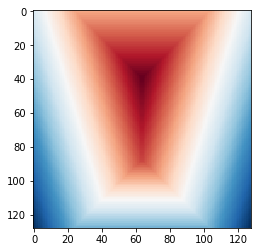

In [65]:
plt.imshow(tdm[:,64,:].T, cmap='RdBu')

In [66]:
from compas_vol.modifications import Shell

In [67]:
shellplane = Overlay(vcyl, Shell(plane))
sdm = shellplane.get_distance_numpy(x, y, z)

In [68]:
display_dm(sdm)

In [69]:
from compas_vol.modifications import MultiShell

In [72]:
shellplane = Overlay(vcyl, MultiShell(plane, 2, 4))
msdm = shellplane.get_distance_numpy(x, y, z)

In [73]:
display_dm(msdm)

In [74]:
p = Point(1, 2, 3)
print(p)

Point(1.000, 2.000, 3.000)


In [75]:
print(shellplane)

Overlay(VolCylinder(Cylinder(Circle(Plane(Point(0.000, 0.000, 0.000), Vector(0.000, 0.000, 1.000)), 15.0), 45.0)),MultiShell(VolPlane(Plane(Point(0.000, 0.000, 0.000), Vector(0.000, 0.000, 1.000))),2.000,4.000),0.100)


In [76]:
from compas.geometry import Vector
sp2 = eval(str(shellplane))

In [77]:
sp2dm = sp2.get_distance_numpy(x, y, z)

In [78]:
display_dm(sp2dm)

In [79]:
cyl2 = Cylinder(Circle(Plane(Point(0,0,0), (0.4,0.4,1)), 15), 45)
vcyl2 = VolCylinder(cyl2)

In [82]:
shellplane = Overlay(vcyl, MultiShell(vcyl2, 2, 4))
sdm2 = shellplane.get_distance_numpy(x, y, z)

In [83]:
display_dm(sdm2)

In [84]:
from compas_vol.utilities import get_random_vector_3D

In [94]:
edges = []
for i in range(7):
    normal = Vector(*get_random_vector_3D())
    plane = Plane(normal * 12, normal)
    cylinder = Cylinder(Circle(plane, 3), 15)
    edges.append(VolCylinder(cylinder))

In [95]:
u = Union(edges)
dmu = u.get_distance_numpy(x, y, z)

In [96]:
display_dm(dmu)

In [97]:
s = VolSphere(Sphere((0, 0, 0), 7))

In [98]:
from compas_vol.combinations import SmoothUnion

In [103]:
su = SmoothUnion(u, s, r=3)

In [104]:
dmsu = su.get_distance_numpy(x,y,z)

In [105]:
display_dm(dmsu)

In [106]:
ssu = Shell(su)

In [107]:
dmssu = ssu.get_distance_numpy(x, y, z)

In [108]:
display_dm(dmssu)

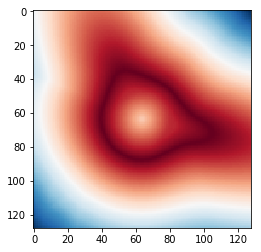

In [109]:
plt.imshow(dmssu[:,64,:].T, cmap='RdBu')